In [6]:
# Import packages
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy, sigmoid_derivative, gradient_update, plot_loss
from helpers import sgd_with_momentum_update, prep_data,  get_best_epoch, get_results, get_best_dev_epoch, shuffle_data
import numpy as np

In [7]:
def initialize_two_layers(X, h1): 
    '''
    --------------------
    Parameter Initialization
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X [n = 12000])
    --------------------
    Output: 
    weights: Weight terms initialized as random normals
    biases: Bias terms initialized to zero
    --------------------
    '''
    dim1 = 1/np.sqrt(X.shape[0])
    W1 = dim1 * np.random.randn(h1, 28**2)
    
    dim2 = 1/np.sqrt(W1.shape[1])
    W2 = dim2 * np.random.randn(1, h1)
    
    b1 = np.zeros((h1, 1))
    b2 = np.zeros((1, 1))
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [8]:
def forward_pass_two_layers(X, weights, biases):
    '''
    ----------------------------------
    Forward propogation:
    Send inputs through the network to
    generate output
    ----------------------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    weights: Binary (1/0) training label (shape = n X 1)
    biases:
    --------------------
    Output: 
    activations: vector of results from passing
    inputs through each neuron
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    
    z1 = W1 @ X + b1
    a1 = sigmoid(z1)
    
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    
    activations = (z1, a1, z2, a2)
    
    return activations

In [9]:
def backpropagation_two_layers(X, y, weights, biases, activations):
    '''
    --------------------
    Backpropagation
    --------------------
    Parameters: 
    X: Numpy array of training features (shape = 784 X n)
    y: Binary (1/0) training label (shape = n X 1)
    weights: Current set of weights
    biases: Current set of biases
    activations: Current set of activations
    --------------------
    Output: 
    Derivatives required
    for optimization update
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    z1, a1, z2, a2 = activations
    m = y.shape[1]
    #print(m)   
    
    dz2 = a2 - y
    #print("dz3", dz3.shape)
    
    dW2 = np.dot(dz2, a1.T)/m
    #print("dW2", dW2.shape)
    
    db2 = np.sum(dz2, axis=1).reshape(-1, 1)/m
    #print("db2", db2.shape)
    
    da1 = np.dot(W2.T, dz2)
    #print("da1", da1.shape)
    
    dz1 = da1 * sigmoid_derivative(z1)
    #print("dz1", dz1.shape)
    
    dW1 = np.dot(dz1, X.T)/m
    #print("dW1", dW1.shape)
    
    db1 = np.sum(dz1, axis=1).reshape(-1, 1)/m
    #print("db1", db1.shape)
    
    return db1, dW1, db2, dW2

In [10]:
def update_parameters_without_momentum(weights, biases, gradients, learning_rate):
    '''
    --------------------
    Update parameters
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    
    W1 = gradient_update(W1, learning_rate, dW1)
    W2 = gradient_update(W2, learning_rate, dW2)
   
    b1 = gradient_update(b1, learning_rate, db1)
    b2 = gradient_update(b2, learning_rate, db2)
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [11]:
def initialize_velocity(weights,biases):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    vw1 = np.zeros(W1.shape)
    vw2 = np.zeros(W2.shape)
    vb1 = np.zeros(b1.shape)
    vb2 = np.zeros(b2.shape)
    return vw1,vw2,vb1,vb2

In [12]:
def update_parameters_with_momentum(weights,biases,gradients,learning_rate,velocity,momentum):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    vw1,vw2,vb1,vb2 = velocity
    W1,vw1 = sgd_with_momentum_update(W1, learning_rate, dW1,vw1,momentum)
    W2,vw2 = sgd_with_momentum_update(W2, learning_rate, dW2,vw2,momentum)
   
    b1,vb1 = sgd_with_momentum_update(b1, learning_rate, db1,vb1,momentum)
    b2,vb2 = sgd_with_momentum_update(b2, learning_rate, db2,vb2,momentum)
    
    weights = (W1, W2)
    biases = (b1, b2)
    velocity = (vw1,vw2,vb1,vb2)
    return weights ,biases,velocity

In [13]:
def output_layer(activations_full):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    y_prob = activations_full[-1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    
    return(y_prob, y_pred)

In [14]:
def batch_training(batch_size, weights, biases, epochs,
                   X, y, momentum_param, lr, X_dev,y_dev, velocity):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    history = {
        "weights": [weights],
        "losses": [], 
        "biases": [biases],
        "accuracies": [],
        "velocity":[velocity],
        "dev_accuracies" :[],
        "dev_loss":[]
    }
    
    
    for epoch in range(epochs):
        
        offset = 0
        weights = history['weights'][epoch]
        biases = history['biases'][epoch]
        velocity = history['velocity'][epoch]
        
        X, y = shuffle_data(X,y)
        
        
        while offset <max(y.shape):
            if offset%1000==0 :
                print("epoch :",epoch," batch:",offset)
            else :
                a=1
            if offset+batch_size >=max(y.shape):
                X_batch = X[:,offset:]
                y_batch = y[:,offset:]
            else :    
                X_batch = X[:,offset:offset+batch_size]
                y_batch = y[:,offset:offset+batch_size]
            
            activations = forward_pass_two_layers(X_batch, weights, biases)
            gradients = backpropagation_two_layers(X_batch, y_batch, weights, biases, activations)
            weights, biases,velocity = update_parameters_with_momentum(weights, biases, gradients, 
                                                                       lr, velocity, momentum_param)
            offset = offset+batch_size
        
        activations_full = forward_pass_two_layers(X, weights, biases)
        y_prob = activations_full[-1]
        y_pred = np.where(y_prob > 0.5, 1, 0)

        loss = get_log_loss(y, y_prob)
        accuracy = get_accuracy(y, y_pred)
        
        activations_dev = forward_pass_two_layers(X_dev,weights,biases)
        y_dev_prob =  activations_dev[-1]
        y_dev_pred = np.where(y_dev_prob > 0.5, 1, 0)
        
        loss_dev = get_log_loss(y_dev,y_dev_prob)
        accuracy_dev = get_accuracy(y_dev,y_dev_pred)

        history["weights"].append(weights)
        history["losses"].append(loss)
        history["biases"].append(biases)
        history["velocity"].append(velocity)
        history["accuracies"].append(accuracy)
        history["dev_accuracies"].append(accuracy_dev)
        history['dev_loss'].append(loss_dev)

        if np.isnan(loss):
            break
        print("loss after epoch: ",epoch,": ",loss)
    
    return history

In [15]:
def run_training(data_path, epochs, mode, model_name, h1, lr, batch_size, momentum_param, grid_search = False):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    np.random.seed(1252908)
    
    X_train_flattened, X_dev_flattened, X_test_flattened, y_train, y_dev, y_test = prep_data(data_path)
    
    if mode == 'full': batch_size = max(y_train.shape)
    elif mode == 'stochastic': batch_size = 1
    
    weights, biases = initialize_two_layers(X_train_flattened, h1)
    velocity = initialize_velocity(weights, biases)
    
    history = batch_training(batch_size, weights, biases, 
                             epochs, X_train_flattened, y_train, 
                             momentum_param, lr, X_dev_flattened, y_dev, 
                             velocity)
    
    best_epoch, _, _ = get_best_epoch(history)
    best_dev_epoch, _, _ = get_best_dev_epoch(history)

    # Plots
    plot_loss("{}_loss.png".format(model_name), history["losses"][:-2])
    plot_loss("{}_accuracy.png".format(model_name), history["accuracies"][:-2], label='Training Accuracy')
    
    # Plot dev loss
    plot_loss("{}_dev_loss.png".format(model_name), history["dev_loss"][:-2], label = 'Dev. Loss')
    plot_loss("{}_dev_accuracy.png".format(model_name), history["dev_accuracies"][:-2], label = "Dev. Accuracy")
    
    # If we are running grid search take the best development epoch and predict again 
    if grid_search:
        activations_dev = forward_pass_two_layers(X_dev_flattened, 
                                                  history["weights"][best_dev_epoch], 
                                                  history["biases"][best_dev_epoch])
        y_dev_prob = activations_dev[-1]
        y_dev_pred = np.where(y_dev_prob > 0.5, 1, 0)
        best_loss_dev = get_log_loss(y_dev,y_dev_prob)
        best_accuracy_dev = get_accuracy(y_dev,y_dev_pred)
        
        return(history, best_epoch, best_dev_epoch, best_loss_dev, best_accuracy_dev)  
        
    else:
        return(history, best_epoch)

In [16]:
def grid_search(data_path, epochs, mode, model_name, h1, 
                lr_grid, batch_size_grid, momentum_grid, 
                start_m = 0, start_lr = 0, start_bs = 0):
    '''
    --------------------
    Prepare data
    --------------------
    Parameters: 
    weights: Current set of weights
    biases: Current set of biases
    gradients: Current set of gradients
    learning_rate: parameter to guide SGD step size
    --------------------
    Output: 
    Updated weights and biases
    --------------------
    '''
    best_params = {}
    best_params['loss'] = np.inf
    best_params['momentum'] = 0
    best_params['lr'] = 0
    best_params['batch_size'] = 0
    best_params["weights"] = 0
    best_params["biases"] = 0
    
    total_iters = len(momentum_grid)*len(lr_grid)*len(batch_size_grid)
    i = 0
                                     
    for m_index, m in enumerate(momentum_grid[start_m:]):
        for lr_index, lr in enumerate(lr_grid[start_lr:]):
            for bs_index, bs in enumerate(batch_size_grid[start_bs:]):
                
                print("We are {}/{} % done!".format(i, total_iters))
                print("This is the {}, {}, {}  entry of the grid".format(m_index, lr_index, bs_index))
                
                history, best_epoch, best_dev_epoch, best_loss_dev, best_accuracy_dev = run_training(data_path, 
                                                                                        epochs, mode, model_name, 
                                                                                        h1, lr, bs, m, grid_search = True)
                
                if best_loss_dev < best_params['loss'] :
                    best_params['momentum'] = m
                    best_params['lr'] = lr
                    best_params['batch_size'] = bs
                    best_params['loss'] = best_loss_dev
                    best_params["weights"] = history["weights"][best_dev_epoch]
                    best_params["biases"] = history["biases"][best_dev_epoch]
                    
                print(best_params['momentum'], best_params['lr'], best_params['batch_size']),
                
                i+=1
                
            
    return(best_params)           

In [17]:
# Set parameters for momentum and grid search demonstration
modes = ['full', 'stochastic', 'mini']
data_path = '../setup/data'
batch_size = 10
epochs = 200 
h1 = 8 
lr = 0.1

In [19]:
# First we train without momentum
# This is why we set the momentum_param to 0
# This is equivalent to running gradient descent
results_without_momentum = {'full':'', 'stochastic':'', 'batch': ''}
model_name = '../figs/{}_without_momentum'
momentum_param = 0

In [ ]:
# We go through each mode with the training call
for mode in modes:
    fig_name = model_name.format(mode)
    results_without_momentum[mode] = run_training(data_path, 
                                                  epochs, mode, fig_name, h1, 
                                                  lr, batch_size, momentum_param)

In [ ]:
# Now we conduct the same rounds of training with momentum
results_with_momentum = {'full':'', 'stochastic':'', 'batch': ''}
model_name = '../figs/{}_with_momentum'
momentum_param = 0.9

In [ ]:
# Call with momentum
for mode in modes:
    fig_name = model_name.format(mode)
    results_without_momentum[mode] = run_training(data_path, 
                                                  epochs, mode, fig_name, h1, 
                                                  lr, batch_size, momentum_param)

In [20]:
# Now use grid search for hyper-parameter optimization
mode = 'mini'
model_name = './../figs/grid_search_result'
epochs = 1

# These are the grids that we will search over
momentum_grid = np.arange(0.01,1,0.1)
lr_grid = np.arange(0.01,0.1,0.01)
batch_size_grid = [16]

We are 0/90 % done!
This is the 0, 0, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  7811.608702834753
best accuracy: 0.75525
best loss: 7811.608702834753
best epoch: 0
best dev accuracy: 0.75525
best dev loss: 7811.608702834753
best dev epoch: 0
0.01 0.01 16
We are 1/90 % done!
This is the 0, 1, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  5535.067475846036
best accuracy: 0.8434166666666667
best loss: 5535.067475846036
best epoch: 0
best dev accuracy: 0.8434166666666667
best dev loss: 5535.067475846036
best dev epoch: 0
0.01 0.01 16
We are 2/90 % done!
This is the 0, 2, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 1

epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  2879.297312788136
best accuracy: 0.93875
best loss: 2879.297312788136
best epoch: 0
best dev accuracy: 0.93875
best dev loss: 2879.297312788136
best dev epoch: 0
0.01 0.01 16
We are 21/90 % done!
This is the 2, 3, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  2278.1419922473447
best accuracy: 0.9469166666666666
best loss: 2278.1419922473447
best epoch: 0
best dev accuracy: 0.9469166666666666
best dev loss: 2278.1419922473447
best dev epoch: 0
0.01 0.01 16
We are 22/90 % done!
This is the 2, 4, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1990.1769312065023
best a

epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1735.7260184734637
best accuracy: 0.9559166666666666
best loss: 1735.7260184734637
best epoch: 0
best dev accuracy: 0.9559166666666666
best dev loss: 1735.7260184734637
best dev epoch: 0
0.01 0.01 16
We are 41/90 % done!
This is the 4, 5, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1613.8929158926162
best accuracy: 0.9578333333333333
best loss: 1613.8929158926162
best epoch: 0
best dev accuracy: 0.9578333333333333
best dev loss: 1613.8929158926162
best dev epoch: 0
0.01 0.01 16
We are 42/90 % done!
This is the 4, 6, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  

epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1374.9786037667823
best accuracy: 0.9650833333333333
best loss: 1374.9786037667823
best epoch: 0
best dev accuracy: 0.9650833333333333
best dev loss: 1374.9786037667823
best dev epoch: 0
0.01 0.01 16
We are 61/90 % done!
This is the 6, 7, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1329.7233958126076
best accuracy: 0.9664166666666667
best loss: 1329.7233958126076
best epoch: 0
best dev accuracy: 0.9664166666666667
best dev loss: 1329.7233958126076
best dev epoch: 0
0.01 0.01 16
We are 62/90 % done!
This is the 6, 8, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  

epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1333.6162826145887
best accuracy: 0.9614166666666667
best loss: 1333.6162826145887
best epoch: 0
best dev accuracy: 0.9614166666666667
best dev loss: 1333.6162826145887
best dev epoch: 0
0.01 0.01 16
We are 81/90 % done!
This is the 9, 0, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1501.8256195269996
best accuracy: 0.9634166666666667
best loss: 1501.8256195269996
best epoch: 0
best dev accuracy: 0.9634166666666667
best dev loss: 1501.8256195269996
best dev epoch: 0
0.01 0.01 16
We are 82/90 % done!
This is the 9, 1, 0  entry of the grid
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  

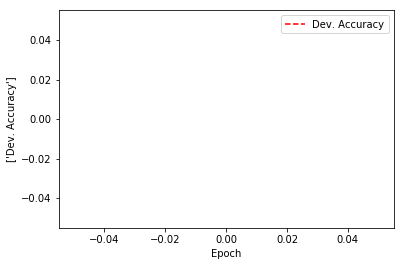

In [21]:
# Finally we call the function
best_params = grid_search(data_path, epochs, mode, model_name, h1, lr_grid, batch_size_grid, momentum_grid)